In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import solve_ivp
from scipy import interpolate 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import datetime
from myfunctions import *
%matplotlib inline

In [2]:
x1 = pd.ExcelFile('../data/Parameters.xlsx')
df1 = x1.parse('Parameters',header=None)

# assigmment of parameters to values: 
for key,val in zip(df1.iloc[:][0],df1.iloc[:][1]):
    exec(key + '=val')
    print(key,val)

#n_reactors = np.int(n_reactors)

Parameter Indoor_value
umol_to_percent_DW 0.0014
n_days 7
Duration 7
Nint0 1.85
m0 0.15
Nintcrit 4.5
miu 0.04
Nintmax 5.5
Nintmin 0.48
Ks 14
Vmax 60
Z 0.178
KI 35
K0 0.5
Ka 0.05
Topt 18
Tmin 5
Tmax 35
n 5
losses20 0.0016
teta 1.047
Sopt 25
Smin 3
Smax 48
Shigh 30
Slow 12
KN 1.1
dNextoutdt 0.014
dNextindt 0
dmoutdt 0
Next00  4032
dilution 0


[0.9999481651374325,
 0.9996064462729727,
 0.9983426163863822,
 0.994950661489069,
 0.9874828019870482,
 0.9731419218688973,
 0.9483038843462392,
 0.9087798720638244,
 0.8504512875359893,
 0.7703706428524044,
 0.6682597470268776]

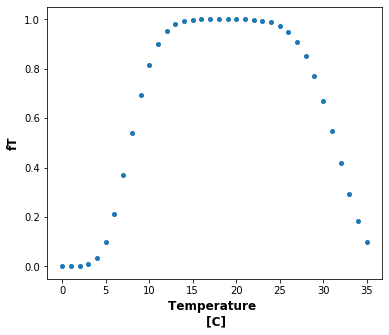

In [3]:
# Temperature growth function
n = 5
Tmax = 35
Topt = 18
T = list(range(0,36))
fTT = []

for Temp in T:
    if Temp <= Topt:
        Tx = Tmin
    else:
        Tx = Tmax
    fT = np.exp(-2.3 * ((Temp - Topt) / (Tx - Topt))**n) # Temp from temperature data
    fTT.append(fT)

fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(T,fTT,'.',markersize=8)
ax.set_ylabel('fT',fontsize=12, weight="bold")
ax.set_xlabel('Temperature \n [C]',fontsize=12, weight="bold")

fTT[20:31]

[0.9686674546631939,
 0.9308787024448945,
 0.8804381126290546,
 0.8195810878671661,
 0.7508831812034266,
 0.6770803024770028,
 0.6008904980966794,
 0.5248531980780585,
 0.4511985687657461,
 0.3817551751666066,
 0.31789925287856224]

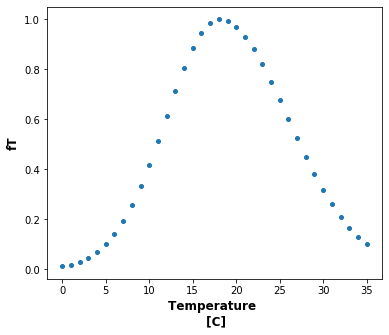

In [4]:
# Temperature growth function
n = 2
Tmax = 35
Topt = 18
T = list(range(0,36))
fTT = []

for Temp in T:
    if Temp <= Topt:
        Tx = Tmin
    else:
        Tx = Tmax
    fT = np.exp(-2.3 * ((Temp - Topt) / (Tx - Topt))**n) # Temp from temperature data
    fTT.append(fT)

fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(T,fTT,'.',markersize=8)
ax.set_ylabel('fT',fontsize=12, weight="bold")
ax.set_xlabel('Temperature \n [C]',fontsize=12, weight="bold")

fTT[20:31]

0.9275280226570297
0.8683127572016461


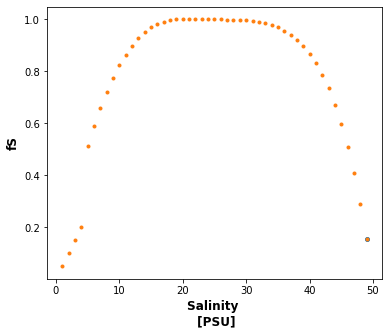

In [5]:
# S (salinity) function
Smin = 0
Sopt = 20
Smax = 50
Salinity = list(range(1,50))
fSS = []

for S in Salinity:
    if S < Sopt:
        Sx = Smin
        n = 2.5
        if S < 5:
            fS = ((S - Smin)/(Sopt - Sx))
            fSS.append(fS)
        elif S >= 5:
            fS = 1 - ((S - Sopt)/(Sx - Sopt)) ** n           
            fSS.append(fS)
    elif S >= Sopt:
        Sx = Smax
        n = 5 #4.4 # found by solver in fs file
        fS = 1 - ((S - Sopt)/(Sx - Sopt)) ** n
        fSS.append(fS)
        
fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(S,fS,'.',markersize=8)
ax.set_ylabel('fS',fontsize=12, weight="bold")
ax.set_xlabel('Salinity \n [PSU]',fontsize=12, weight="bold")

plt.plot(Salinity,fSS,'.')

print(fSS[12])
print(fSS[39])

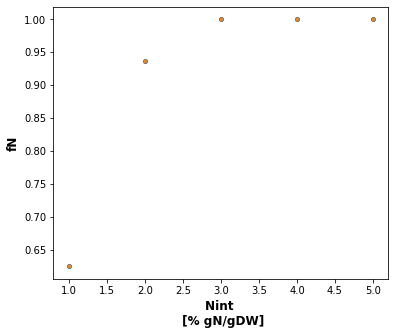

In [6]:
# N  function
Nintmin = 0.5
Nintmax = 4.25
Nintcrit = 2.5
N = list(range(1,6))
fNN = []

for Nint in N:
    if Nint >= Nintcrit:
        fN = 1
    else:
        fN = ((Nint - Nintmin)/Nint) / ((Nintcrit - Nintmin)/Nintcrit)  # units: [ ]
    fNN.append(fN)
fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(N,fNN,'.',markersize=8)
ax.set_ylabel('fN',fontsize=12, weight="bold")
ax.set_xlabel('Nint \n [% gN/gDW]',fontsize=12, weight="bold")

plt.plot(N,fNN,'.')
